In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import chi2

# zad 2

--------------- k = 11 ---------------------------


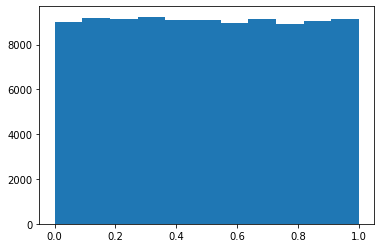

9.7054 0.5332913986485865


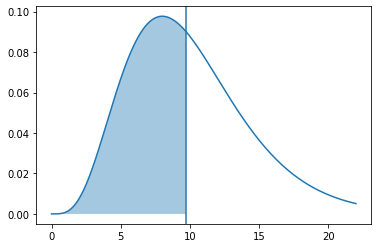

--------------- k = 51 ---------------------------


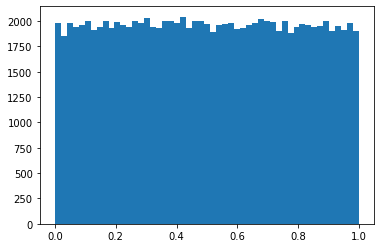

41.16853999999999 0.19119633763316174


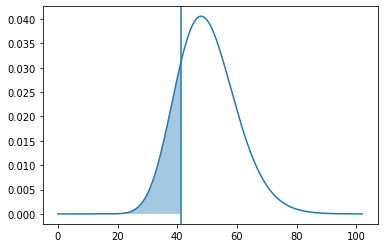

--------------- k = 101 ---------------------------


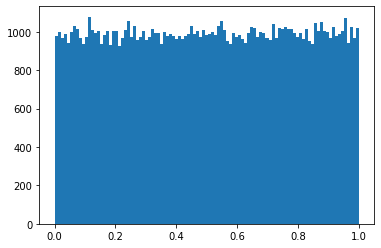

101.02121999999994 0.5473979073024847


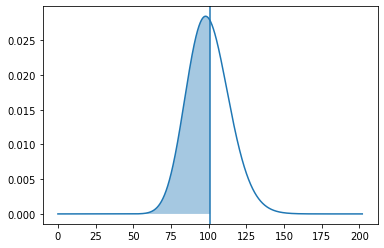

In [113]:
n = 100000

kValues = [11, 51, 101]
for k in kValues:
    print(f"--------------- k = {k} ---------------------------")
    numbers = np.random.rand(n)
    p = 1/k

    counts = plt.hist(numbers, k)
    plt.show()

    sum = 0
    for ni in counts[0]:
        sum += (ni - n*p)**2/(n*p)

    print(sum, chi2.cdf(sum, k-1))

    x = np.arange(0, 2*k, 0.001)
    plt.plot(x, chi2.pdf(x, df=k-1))
    plt.axvline(sum)
    x = np.arange(0, sum, 0.001)
    plt.fill_between(x, chi2.pdf(x, df=k-1), step="pre", alpha=0.4)
    plt.show()

# Wnioski
We wszystkich prapadkach testy przeszły. Wizualnie widać, że rozkład przypomina równomierny. Przeszły wszystkie nasze hipotezy staatystyczne.

# zad 3

In [49]:
def std(V, N, M):
    return V*np.sqrt(1/N*M/N*(1-M/N))

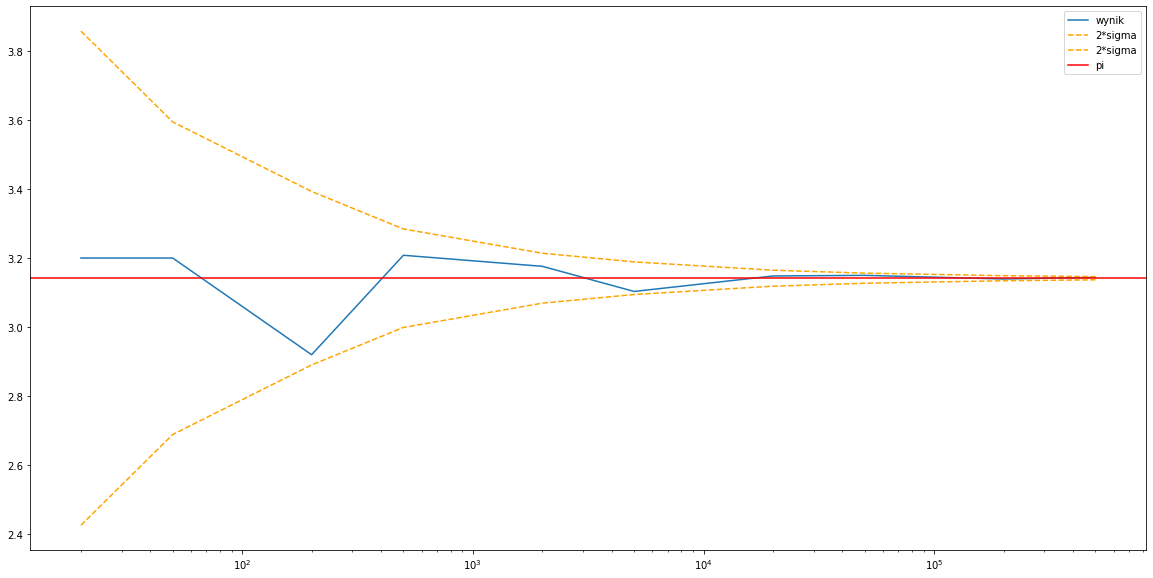

In [91]:
df = pd.DataFrame(columns=['N', 'wynik', 'std'])

N = [20, 50, 200, 500, 2000, 5000, 20000, 50000, 200000, 500000]
M = 0
V = 4

for i in range(len(N)):
    M = 0
    for _ in range(N[i]):
        x = 2*np.random.rand(1) - 1
        y = 2*np.random.rand(1) - 1
        if (x**2 + y**2) < 1:
            M += 1
    df = pd.concat([df, pd.DataFrame({'N':[N[i]], 'wynik':[M/N[i]*4], 'std':[std(V, N[i], M)]})])

plt.figure(figsize=(20,10))
plt.semilogx(df['N'],df['wynik'])
plt.semilogx(df['N'],2*df['std']+np.pi, '--', color='orange')
plt.semilogx(df['N'],-2*df['std']+np.pi, '--', color='orange')
plt.axhline(np.pi, color='red')
plt.legend(['wynik', '2*sigma','2*sigma','pi'])
plt.show()

# Wnioski
Wraz z większą ilością iteracji wartość $\pi$ jest lepiej wyestymowana. $\sigma$ ~ $~1/\sqrt n$

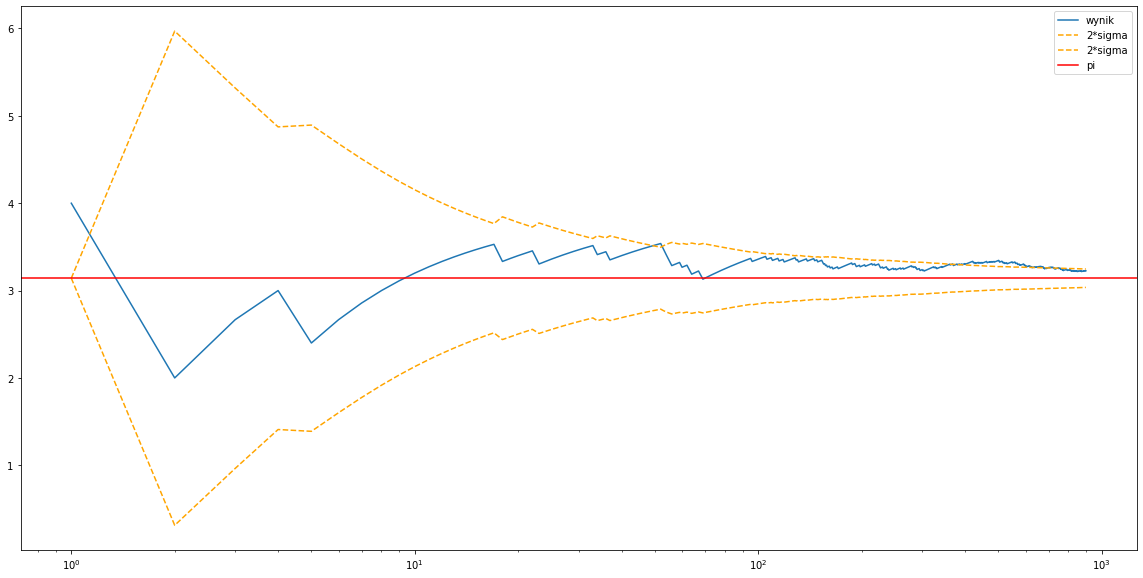

In [93]:
df = pd.DataFrame(columns=['N', 'wynik', 'std'])

N = 1000
M = 0
V = 4
M = 0

for i in range(101,N):
    x = 2*np.random.rand(1) - 1
    y = 2*np.random.rand(1) - 1
    if (x**2 + y**2) < 1:
        M += 1
    df = pd.concat([df, pd.DataFrame({'N':[i-100], 'wynik':[M/(i-100)*4], 'std':[std(V, i-100, M)]})])
plt.figure(figsize=(20,10))
plt.semilogx(df['N'],df['wynik'])
plt.semilogx(df['N'],2*df['std']+np.pi, '--', color='orange')
plt.semilogx(df['N'],-2*df['std']+np.pi, '--', color='orange')
plt.axhline(np.pi, color='red')
plt.legend(['wynik', '2*sigma','2*sigma','pi'])
plt.show()

# Wnoiski
Ten wykres pokazuje lepiej jak z każdą iteracją obliczana wartość $\pi$ jest bliższa prawdziwej.

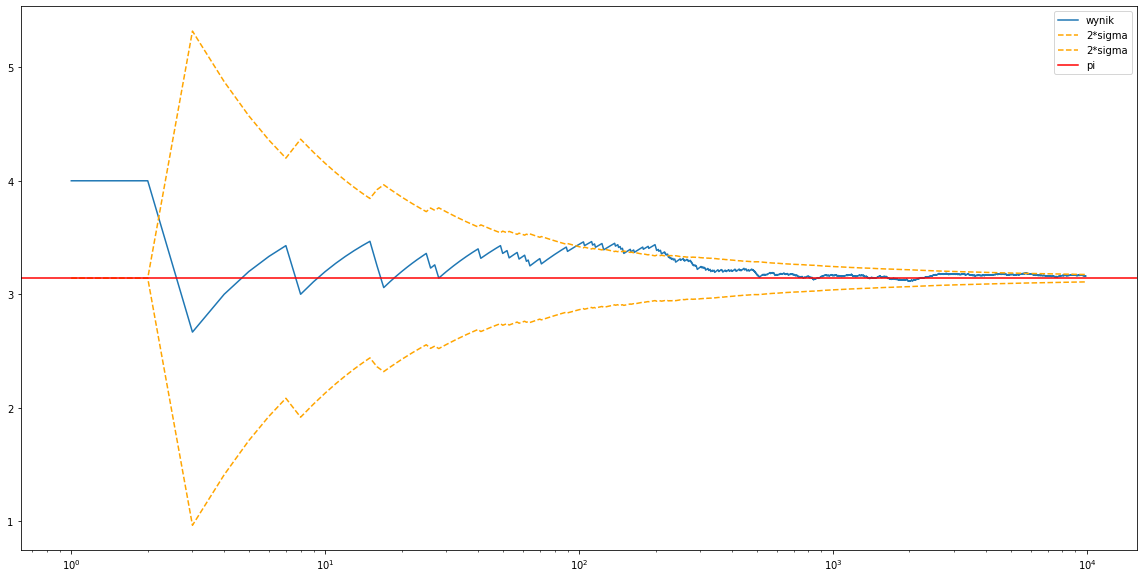

In [127]:
df = pd.DataFrame(columns=['N', 'wynik', 'std'])

N = 10000
M = 0
V = 4
M = 0

for i in range(101,N):
    x = 2*np.random.rand(1) - 1
    y = 2*np.random.rand(1) - 1
    if (x**2 + y**2) < 1:
        M += 1
    df = pd.concat([df, pd.DataFrame({'N':[i-100], 'wynik':[M/(i-100)*4], 'std':[std(V, i-100, M)]})])
plt.figure(figsize=(20,10))
plt.semilogx(df['N'],df['wynik'])
plt.semilogx(df['N'],2*df['std']+np.pi, '--', color='orange')
plt.semilogx(df['N'],-2*df['std']+np.pi, '--', color='orange')
plt.axhline(np.pi, color='red')
plt.legend(['wynik', '2*sigma','2*sigma','pi'])
plt.show()